In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
X, y = make_regression(n_samples=500, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X.shape[1])])
train_data['Target'] = y_train

test_data = pd.DataFrame(X_test, columns=[f"Feature_{i}" for i in range(X.shape[1])])
test_data['Target'] = y_test

In [3]:
class GradientBoostingMachine:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        # Initialize with the mean of the target values
        self.initial_prediction = np.mean(y)
        residual = y - self.initial_prediction

        for i in range(self.n_estimators):
            # Train a decision tree on the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)

            # Predict residuals and scale by learning rate
            predictions = self.learning_rate * tree.predict(X)

            # Update residuals
            residual -= predictions

            # Store the tree
            self.models.append(tree)

    def predict(self, X):
        # Start with the initial prediction
        prediction = np.full(X.shape[0], self.initial_prediction)

        # Add predictions from each tree
        for tree in self.models:
            prediction += self.learning_rate * tree.predict(X)

        return prediction

In [4]:
# Separate features and target
X_train_features = train_data.drop(columns=['Target']).values
y_train_target = train_data['Target'].values

# Instantiate and train the GBM
gbm = GradientBoostingMachine(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm.fit(X_train_features, y_train_target)

In [5]:
# Predictions on test set
X_test_features = test_data.drop(columns=['Target']).values
y_test_target = test_data['Target'].values

y_pred = gbm.predict(X_test_features)

# Calculate metrics
mse = mean_squared_error(y_test_target, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Squared Error: 578.6348
Root Mean Squared Error: 24.0548


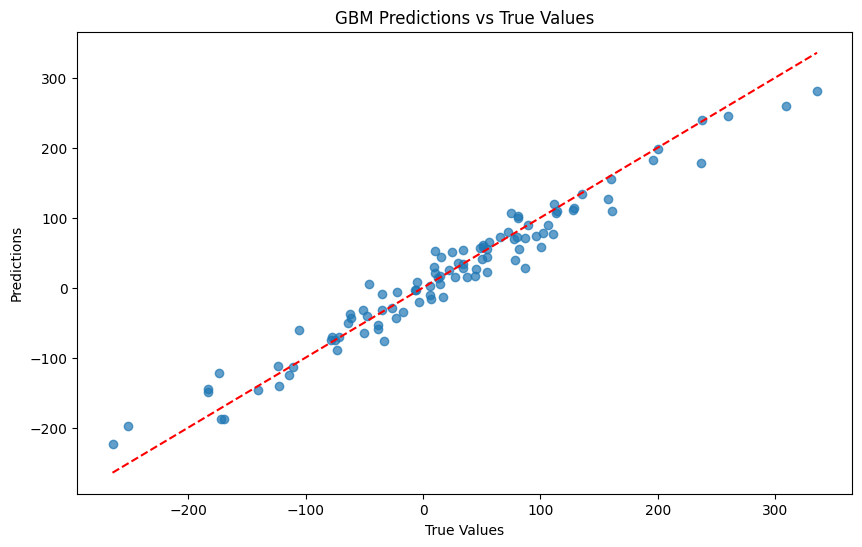

In [6]:
# Visualize predictions vs. ground truth
plt.figure(figsize=(10, 6))
plt.scatter(y_test_target, y_pred, alpha=0.7)
plt.plot([y_test_target.min(), y_test_target.max()], [y_test_target.min(), y_test_target.max()], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("GBM Predictions vs True Values")
plt.show()

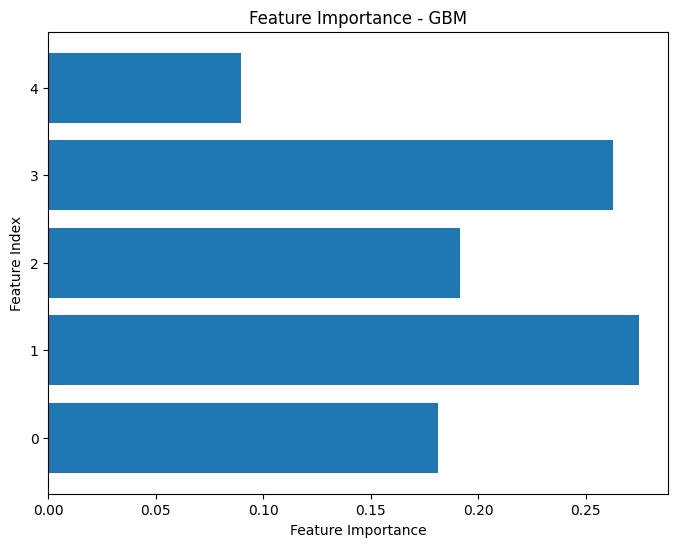

In [7]:
# Feature importance visualization
importances = np.zeros(X_train_features.shape[1])

for tree in gbm.models:
    importances += tree.feature_importances_

importances /= gbm.n_estimators

plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Index")
plt.title("Feature Importance - GBM")
plt.show()